# Generalised Network Autoregressive Processes and the GNAR package
> Marina Knight, Kathryn Leeming, Guy Nason, Matthew Nunes

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [논문리뷰]

## Abstract

- This article introduces **the GNAR package**, which **fits, predicts, and simulates from a powerful new class of generalised network autoregressive processes**. 
- Such processes consist of a multivariate time series along with a real, or inferred, network that provides information about inter-variable relationships. 
- *The GNAR model relates values of a time series for a given variable and time to earlier values of the same variable and of neighbouring variables, with inclusion controlled by the network structure.*
    - GNAR model은 네트워크 구조에 의해 제어되는 inclusion을 가지고 인접 변수의 이전 값, 동일한 변수의 이전값을 주어진 변수와 시간에 대한 시계열 값과 연관시킴!
- The GNAR package is designed to fit this new model, while working with standard ts objects and the igraph package for ease of use.

## 2. Network time series processes

다변량 시계열이 이전 시간 step에서 인접 노드들에 따라 자기회귀와 유사한 모델을 따른다고 가정

### 2.1. Network terminology and notation

- 그래프 $\mathcal{G} = ( \mathcal{K}, \mathcal{E} )$
    - where $\mathcal{K} = \{1, \dots N \}$ is the set od nodes
    - $\mathcal{E}$ is the set of edges
- A directed edge from node $i ∈ \mathcal{K}$ to $j ∈ \mathcal{K}$ is denoted $i \rightarrow j$, and an un-directed edge between the nodes is denoted $i \leftrightarrow j$.
-  The edge set of a directed graph is $\mathcal{E} = {(i, j) : i j;i, j ∈ \mathcal{K}}$, and similarly for the set of un-directed edges.

*Stage-r neighbourhoods*

- $A \subset \mathcal{K}$
- the neighbour set of $A$ 
    - $\mathcal{N}(A) = \{ J \in \mathcal{K} / A : i \rightarrow j ; i \in A \}$
- The rth stage neighbours of a node $i ∈ \mathcal{K}$ are given by $\mathcal{N}^(r)(i) = \mathcal{N} \{ \mathcal{N}^{(r−1)}(i) \} / [ \{\cup ^{r−1}_{q=1} \mathcal{N}^(q)(i) \} \cup \{ i \} ]$, for $r = 2, 3, ...$ and $\mathcal{N}^{(1)}(i) = \mathcal{N} ( \{ i \} )$.


*Connection weight*

- Each network can have connection weight $w \in [0,1]$ associated with every pair of nodes.
    - The connection weight can depend on the size of the beighbour set
        - also encodes any edge-weight information
- the values of the connection weights from a node $i ∈ \mathcal{K}$ to its stage-r neighbour $j ∈ \mathcal{N}^{(r)}(i)$ will be the reciprocal of the number of stage-r neighbours; $ω_{i,j} = |N^{(r)}(i)|^{−1}$, where $| · |$ denotes the cardinality of a set.
- Connection weights are necessarily symmetric, even for an un-directed graph.
- We note that this choice of these inverse distance weights is one of many possibilities, and some other means of creating connection weights could be used.
- When the edges are weighted, or have a distance associated with them, we use the concept of distance to find the shortest path between two vertices.
    - the distance from node $i$ to $l$ be denoted $d_{i,j} \in \mathbb{R}_{+}$
    - if there is an un-nomalised weight between thses nodes, denote this $\mu_{i,l} \in \mathbb{R}_{+}$
- To find the length of connection between a node i and its stage-r neighbour, $k$, we sum the distances on the paths with r edges from $i$ to $k$ and take the minimum.
- If the network includes weights rather than distances, we find the shortest $r$ length path where $d_{i,l} = µ^{−1}_{i,l}$ .

*Edge or node covariates*

- A further important innovation permits a covariate that can be used to encode edges effects (or nodes) into certain types.
- Our covariate will take $C ∈ \mathbb{N}$ discrete values and be indexed by $c$. 
- A more general covariate could be considered, but we wish to keep our notation simple in the definition that follows.
- The covariates do not change our neighbour sets or connection weight definitions, so we have the property $\sum_{q∈\mathcal{N}^{(r)}(i)} \sum^{C}_{c=1} ω_{i,q,c} = 1$ for all $i ∈ \mathcal{K}$ and $r ∈ \mathbb{N}$ such that $\mathcal{N}^{(r)} (i)$ is non-empty

### 2.2. The generalised network autoregressive model

- Consider an $N × 1$ vector of nodal time series, $X_t = (X_{1,t}, . . . , X_{N,t})'$, where N$ $is considered fixed.
- Our aim is to model the dependence structure within and between the nodal series using the network structure provided by (potentially time-varying) connection weights, $ω$.
    - 목적: 잠재적으로 변동 가능한 연결 가중치에 의해 주어진 네트워크 구조로 노드 시리즈 내부와 사이의 의존적 구조를 모델링하는것
- For each node $i ∈ \{1, . . . , N\}$ and time $t ∈ \{1, . . . , T\}$, our generalised autoregressive model of order $(p, [s]) ∈ \mathbb{N} × \mathbb{N}^{p}_{0}$ for $X_t$ is
$$X_{i,t} = \sum^{p}_{j=1} \big( \alpha_{i,j} X_{i,t-j} + \sum^{C}_{c=1} \sum^{s_j}_{r=1} \beta_{j,r,c} \sum_{q \in \mathcal{N}^{(r)}_{t} (i)} s^{(t)}_{i,q,c} X_{q,t-j}  \big) + u_{i,t}$$

- where $p ∈ \mathcal{N}$ is the maximum time lag, $[s] = (s_1, . . . , s_p)$ and $s_j ∈ \mathbb{N}_0$ is the maximum stage of neighbour dependence for time lag $j$, with $\mathbb{N}_0 = \mathbb{N} ∪ {0}, \mathcal{N}^{(r)}_{t} (i)$ is the $r$th stage neighbour set of node $i$ at time $t$, $ω^{(t)}_{i,q,c} ∈ [0, 1]$ is the connection weight between node $i$ and node $q$ at time $t$ if the path corresponds to covariate c.
- Here, we consider a sum from one to zero to be zero, i.e., $\sum^{0}_{r=1}(·) := 0$. The $α_{i,j} ∈ R$ are ‘standard’ autoregressive parameters at lag $j$ for node $i$.
- The $β_{j,r,c} ∈ \mathbb{R}$ correspond to the effect of the $r$th stage neighbours, at lag $j$, according to covariate $c = 1, . . . , C$.
- Later, we derive conditions on the model parameters to achieve process stationarity over the network. 
-  Here the noise, $\{ u_{i,t} \}$, is assumed to be independent and identically distributed at each node $i$, with mean zero and variance $σ^{2}_{i}$.

- We note that crucially, the time-dependent network topology is integral to the model parametrisation through the use of time-varying weights and neighbours. 
    - 시간 의존적 topology가 시간 변동 가중치와 인접 가중치의 사용을 통해 모델 매개 변수화하는데 필수적!
- These features yield a model that is sensitive to the network structures and captures contemporaneous as well as autoregressive relationships, as defined by equation (1). 
- The network should therefore be viewed not as an estimable quantity, but as a time-dependent known structure.
    - 네트워크는 추정가능한 양이 아니라 시간 의존적인 알려진 구조로 봐야 한다!

- In the GNAR model, the network may change over time, but the covariates stay fixed. 
    - **GNAR 모델은 시간이 변하면 네트워크가 변할 수 있지만 공변량은 고정되어 있음**
- This means that the underlying network can be altered over time, for example, to allow for nodes to drop in and out of the series but model fitting can still be carried out. 
    - 기본 네트워크는 시간이 흐르면 변경할 수 있고, 노드가 시리즈에 들어오고 나와도 모델 피팅이 가능!
- Practically, this is extremely useful, as shown by the example in Section 4.
- Our model allows for the α parameters may be different at each node, however the interpretation of the network regression parameters, βj,r,c, is the same throughout the network. A more restrictive version of the above model is the global-α GNAR(p, [s]) model, which has the same autoregressive covariate at each node, where the αi,j are replaced by αj . This defines a process with the same behaviour at every node, with differences being present only due to the graph structure.

### 2.3. GNAR network example

- Networks in the GNAR package are stored in a list with two components edges and dist.
    - edge와 dist에 저장되는 GNAR 패키지
- The edges component is itself a list with N slots each containing a vector whose entries are indices to their neighbouring nodes.
- If the network is undirected this will mean that each edge is ‘double counted’ in summary information.
- A directed edge 3 4 would be listed in edges[[3]] as a 4, but not edges[[4]] if there is no edge in the opposite direction.
- The dist component is of the same format as edges, and contains the distances corresponding to the edge links, if they exist.
- For example, in an un-weighted setting, the connection weights are such that all neighbours of a node have equal effect on the node.
- This is achieved by setting all entries of the dist component to one, and the software calculates the connection weight from these. 

In [41]:
library("GNAR")
library("igraph")

---

**면담 내용**

* 항상 노드의 수가 일정해야함
* 여러 시점 시리즈 분석
* 기차역 같은 교통정보나 계속 발생하는 지형정보 등, 지진 같은 건 안 되겠지.

노드가 $A,B,C,D$가 있다고 할때, $N = 4$, $t=1~T$

$A--$ $B$

$B--$ $C$

$B--$ $D$

라고 할때

$X_{11}$ = 시점 1에 노드 A의 탑승객수, $X_{21}$ = 시점 1에 노드 B의 탑승객수, $X_{31}$ = 시점 1에 노드 C의 탑승객수, $X_{41}$ = 시점 1에 노드 D의 탑승객수, $\dots$, $X_{it}$ = 시점 t에 노드 i의 탑승객수

$x_{it-1},x_{it-2}, \dots , x_{it-p}$를 구하기 위해 $x_{it}$가 필요하지.

$x_{it-1},x_{it-2}, \dots , x_{it-p}$에서 $i$ 근처 노드들도 필요하고.

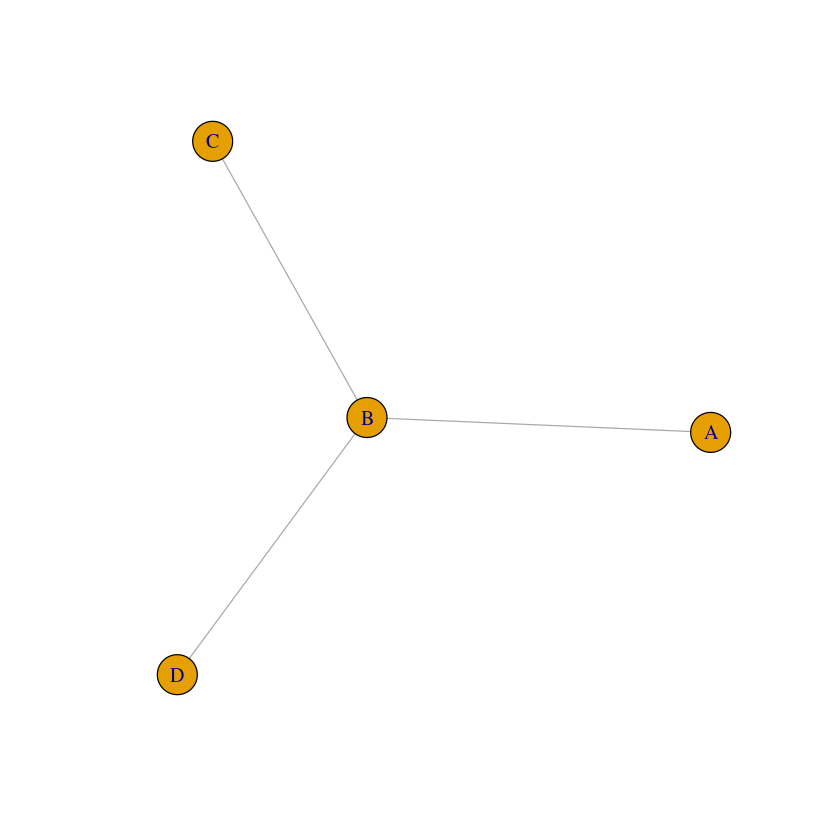

In [42]:
plot.igraph(graph_from_literal(A-B, B-C, B-D))

---

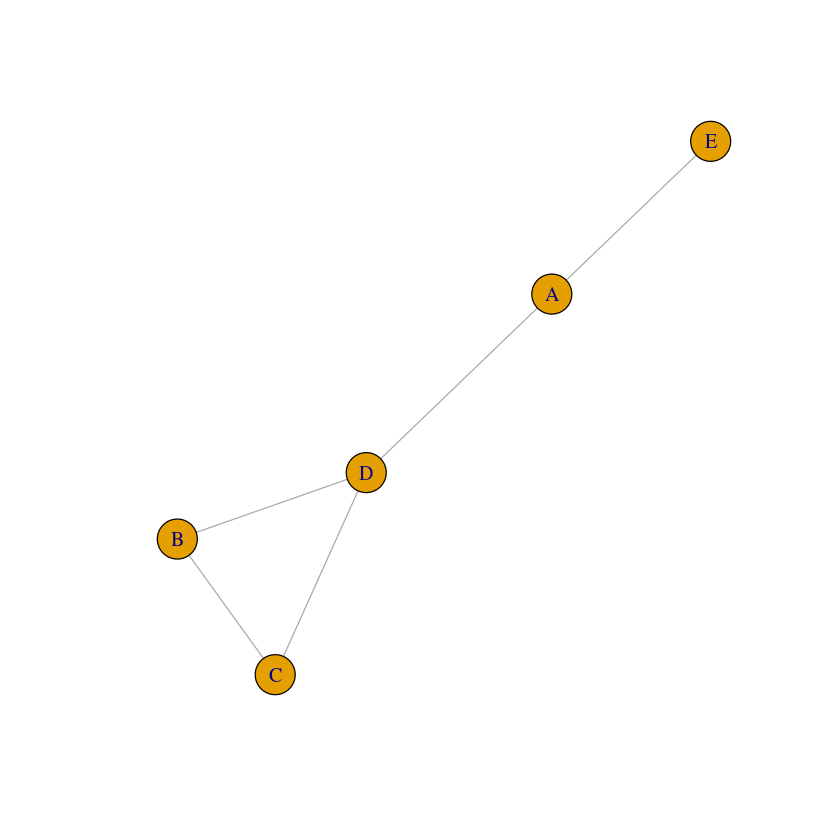

In [43]:
plot(fiveNet, vertex.label = c("A","B","C","D","E"))

Stage-r neighbourhoods
- node E는 stage-1 neighbour A를 가지고 있고, stage-2 neighbour D를 가지고 있고, stage-3 neighbours B,C를 가지고 있다.
- 여기서 이웃 집합은 $ \mathcal{N}^{(1)}(D) = \{ A, B, C \}$ 와 $ \mathcal{N}^{(3)}(E) = \{ B, C \} $이다.
- In the time-varying network setting, a subscript t is added to the neighbour set notation.

Connection weight
- $w_{E,A} = 1, w_{A,E} = w_{A,D} = 0.5$

In [44]:
summary(fiveNet)

GNARnet with 5 nodes and 10 edges
 of equal length  1

**Converting a network to GNARnet form**

- Our GNARnet format integrates with other methods of specifying a network via a set of functions that generate a GNARnet from others, such as an igraph object.
- An igraph object can be converted to and from the GNARnet structure using the functions igraphtoGNAR and GNARtoigraph, respectively. 
    - GNARnet 구조 변환 가능

In [45]:
fiveNet2 <- GNARtoigraph(net = fiveNet)
summary(fiveNet2)

IGRAPH ff52208 U-W- 5 5 -- 
+ attr: weight (e/n)


In [46]:
fiveNet3 <- igraphtoGNAR(fiveNet2)
all.equal(fiveNet,fiveNet3)

[1] TRUE

- whereas the reverse conversion would be performed as

In [47]:
g <- make_ring(10)
print(igraphtoGNAR(g))

GNARnet with 10 nodes 
edges:1--2 1--10 2--1 2--3 3--2 3--4 4--3 4--5 5--4 5--6 
     6--5 6--7 7--6 7--8 8--7 8--9 9--8 9--10 10--1 10--9 
     
 edges of each of length  1 


- We can also use the GNARtoigraph function to extract graphs involving higher-order neighbour structures, for example, creating a network of third-order neighbours.
- In addition to interfacing with igraph, we can convert between GNARnet objects and adjacency matrices using functions as.matrix and matrixtoGNAR.
    - GNARnet 개체와 인접 행렬 간 변환 가능

In [48]:
as.matrix(fiveNet)

0,0,0,1,1
0,0,1,1,0
0,1,0,1,0
1,1,1,0,0
1,0,0,0,0


- and an example converting a weighted adjacency matrix to a GNARnet object is

In [49]:
adj <- matrix(runif(9), ncol = 3, nrow = 3)
adj[adj < 0.3] <- 0
print(matrixtoGNAR(adj))

GNARnet with 3 nodes 
edges:1--2 1--3 2--1 2--3 3--1 
 edges of unequal lengths 


### 2.4. Example: GNAR model fitting

- The fiveNet network has a simulated multivariate time series associated with it of class ts called fiveVTS.
    - fiveVTS는 class ts의 시뮬레이ㅅ션 다변량 시계열로 연결되어 있음
- The pair together are a network time series.
- The object can be loaded in the usual way using the data function. 
- GNAR contains functions for fitting and predicting from GNAR models: GNARfit and the predict method, respectively.
- These make use of the familiar R command lm, since the GNAR model can be essentially re-formulated as a linear model, as we shall see in Section 3 and Appendix B. 
- As such, least squares variance / standard error computations are also readily obtained, although other, e.g., HAC-type variance estimators could also be considered for GNAR models.
- Suppose we wish to fit the global-α network time series model GNAR(2, [1, 1]), a model with four parameters in total. 
    - 4개의 파라미터를 가진 모델로 global alpha 네트워크 시계열 모델을 적합한다 가정

In [50]:
data("fiveNode")
answer <- GNARfit(vts = fiveVTS, net = fiveNet, alphaOrder = 2,
                  betaOrder = c(1,1))
answer

Model: 
GNAR(2,[1,1]) 

Call:
lm(formula = yvec ~ dmat + 0)

Coefficients:
 dmatalpha1  dmatbeta1.1   dmatalpha2  dmatbeta2.1  
    0.20624      0.50277      0.02124     -0.09523  


- In this fit, the global autoregressive parameters are $\hat{α}_1 ≈ 0.206$ and $\hat{α}_2 ≈ 0.021$ and the $β$ network parameters are $\hat{β}_{1,1,1} ≈ 0.503$ and $\hat{β}_{2,1,1} ≈ −0.095$.
- Also, the network edges only have one type of covariate so $C = c = 1$.
- We can just look at one node. For example, the model at node A is
$$X_{A,t} = 0.206X_{A,t−1}+0.503(X_{E,t−1}+X_{D,t−1})/2+0.021X_{A,t−2}−0.095(X_{E,t−2}+X_{D,t−2})/2+u_{E,t}.$$
- The model coefficients can be extracted from a GNARfit object using the coef function as is customary. 
- The GNARfit object returned by GNARfit function also has methods to extract fitted values and the residuals.
- For example, Figure 2 shows the first node time series and the residuals from fitting the model.

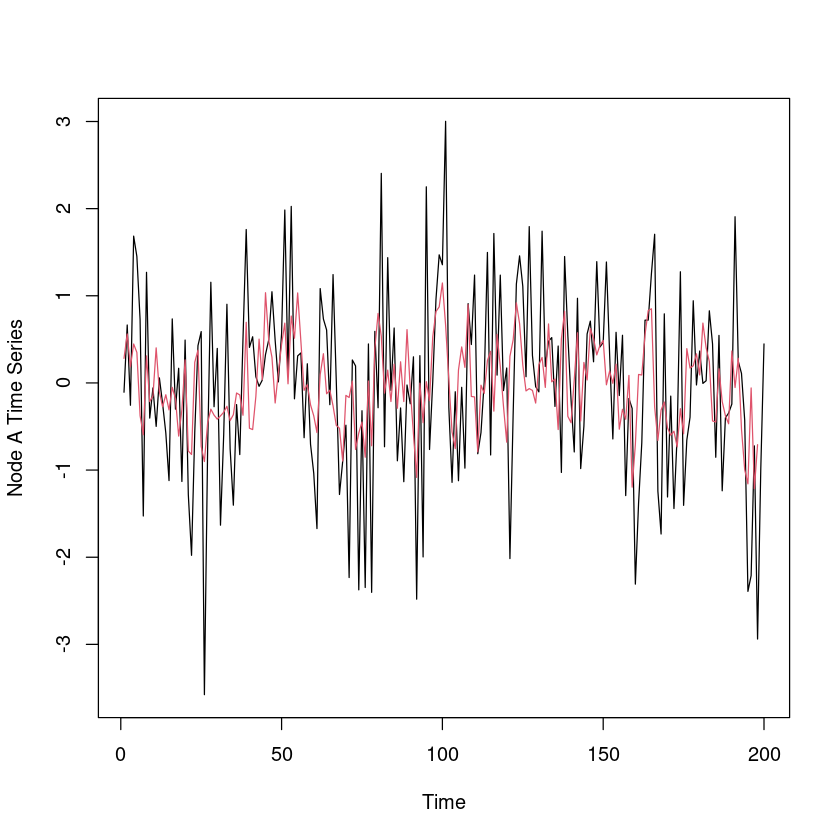

In [51]:
plot(fiveVTS[, 1], ylab = "Node A Time Series")
lines(fitted(answer)[, 1], col = 2)

Alternatively, we can examine the associated residuals

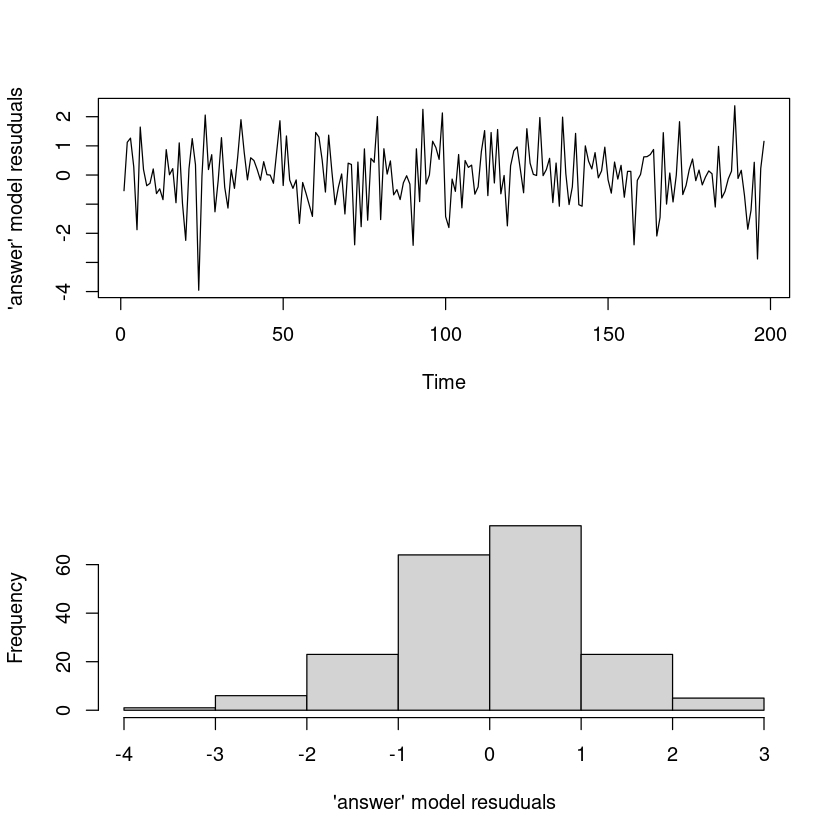

In [52]:
myresiduals <- residuals(answer)[,1]
layout(matrix(c(1,2),2,1))
plot(ts(residuals(answer)[, 1]), ylab = "'answer' model resuduals")
hist(residuals(answer)[, 1], main = "",
     xlab = "'answer' model resuduals")

### 2,5. Example: GNAR data simulation on a given network

- The following example demonstrates network time series simulation using the network in Figure 1.
- Model (a) is a GNAR(1, [1]) model with individual α parameters, $(α_{A,1}, α_{B,1}, α_{C,1}, α_{D,1}, α_{E,1}) = (0.4, 0, −0.6, 0, 0)$, and the same $β$ parameter throughout, $β_1 = 0.3$.
- Model (b) is a global-$α$ GNAR(2, [2, 0]) model with parameters $α_1 = 0.2, β_{1,1} = 0.2, β_{1,2} = 0.3$ and $α_2 = 0.3$.
- Both simulations are created using standard normal noise whose standard deviation is controlled using the sigma argument.

- By fitting an individual-alpha GNAR(1, [1]) model to the simulated data with the fiveNet network, we can see that these estimated parameters are similar to the specified ones of $0.4, 0, -0.6, 0, 0 and 0.3$.
- This agreement does not come as a surprise given that we show theoretical consistency for parameter estimators (see Appendix B).

In [56]:
set.seed(10)
fiveVTS2 <- GNARsim(n = 200, net = fiveNet,
                    alphaParams = list(c(0.4,0,-0.6,0,0)),betaParams = list(c(0,3)))
print(GNARfit(vts = fiveVTS2, net = fiveNet, alphaOrder = 1,
           betaOrder = 1, globalalpha = FALSE))

Model: 
GNAR(1,[1]) 

Call:
lm(formula = yvec ~ dmat + 0)

Coefficients:
dmatalpha1node1  dmatalpha1node2  dmatalpha1node3  dmatalpha1node4  
       3.084054         3.076928         3.074572        -2.748841  
dmatalpha1node5      dmatbeta1.1  
      -2.984518         0.007694  



Repeating the experiment for the GNAR(2, [2, 0]) Model (b), the estimated parameters are again similar to the generating parameters:

In [57]:
set.seed(10)
fiveVTS3 <- GNARsim(n = 200, net = fiveNet,
                    alphaParams = list(rep(0.2,5),rep(0.3,5)),
                    betaParams = list(c(0.2,0.3), c((0))))
print(GNARfit(vts = fiveVTS3, net = fiveNet, alphaOrder = 2,
              betaOrder = c(2,0)))    

Model: 
GNAR(2,[2,0]) 

Call:
lm(formula = yvec ~ dmat + 0)

Coefficients:
 dmatalpha1  dmatbeta1.1  dmatbeta1.2   dmatalpha2  
     0.2537       0.1049       0.3146       0.2907  



Alternatively, we can use the simulate $S3$ method for GNARfit objects to simulate time series associated to a GNAR model, for example

In [22]:
fiveVTS4 <- simulate(GNARfit(vts = fiveVTS2, net = fiveNet,
                             alphaOrder = 1, betaOrder = 1, globalalpha = FALSE), n = 200)                    

### 2.6. Missing data and changing connection weights with GNAR mofrls

- A key advantage of our parsimonious GNAR model is that it models via neighbourhoods across the entire data set. 
    - GNAR은 전제 데이터 set에 대해 이웃을 통해 모델화한다는 것이 장점
- If a node is missing for a given time, then it does not contribute to the estimation of neighbourhood parameters that the network structure suggests it should, and there are plenty of other nodes that do contribute, generally resulting in a high number of observations to estimate each coefficient. 
    - 노드가 그 타임동안 결측이 되면 네트워크 구조가 제안하는 이웃 매개변수의 추정에 기여하지 않고 기여하는 다른 노드가 많아서 일반적으로 각 계수를 추정하는 개체의 수가 많다는 결과가 나옴.
- In GNAR models, missing data of this kind is not I've got a problem.
    - 데이터 누락 문제도 없나보네

- The flexibility of GNAR modelling means that we can also model missing data as a changing network, or alternatively, as changing connection weights. 
    - GNAR의 유연성; 결측 데이터를 변화하는 네트워크 또는 연결 가중치 변경으로 모델링 가능
- In the situation where the overall network is considered fixed, but when observations are missing at particular nodes, the connections and weightings need altering accordingly. 
    - 이 경우 전체 네트워크가 고정이라고 간주되지만 특정 노드에서 관측값이 누락되었을때 그에 따라 연결과 가중치를 변경할 필요가 있다.
- Again, using the graph in Figure 1, consider the situation where node A does not have any data recorded. 
- Yet, we want to preserve the stage-2 connection between D and E, and the stage-3 connection between E and both B and C.
- To do this, we do not redraw the graph and remove node A and its connections, instead we reweight the connections that depend on node A.
    - 지금 가진 연결을 유지하기 위해 그래프를 다시 그리고 노드A 와 노드 연결을 제거하지 않은 채 노드 A에 따른 결 가중치 다시 매기기
- As node A does not feature in the stage-2 or stage-3 neighbours of E, the connection weights $ω_{E,D}, ω_{E,B,} ω_{E,C}$ do not change, but the connection weight ωE,A drops to zero in the absence of observation from node A.
- Similarly, the stage-1 neighbours of D are changed without A, so $ω_{D,A}$ drops to zero and the other two connection weights from node D increase accordingly; $ω_{D,B} = ω_{D,C} = 0.5$.
- Missing data of this kind is handled automatically by the GNAR functions using customary NA missing data values present in the vts (vector time series) component of the overall network time series. 
- For example, inducing some (artificial) missingness in the fiveVTS series, we can still obtain estimates of model parameters:

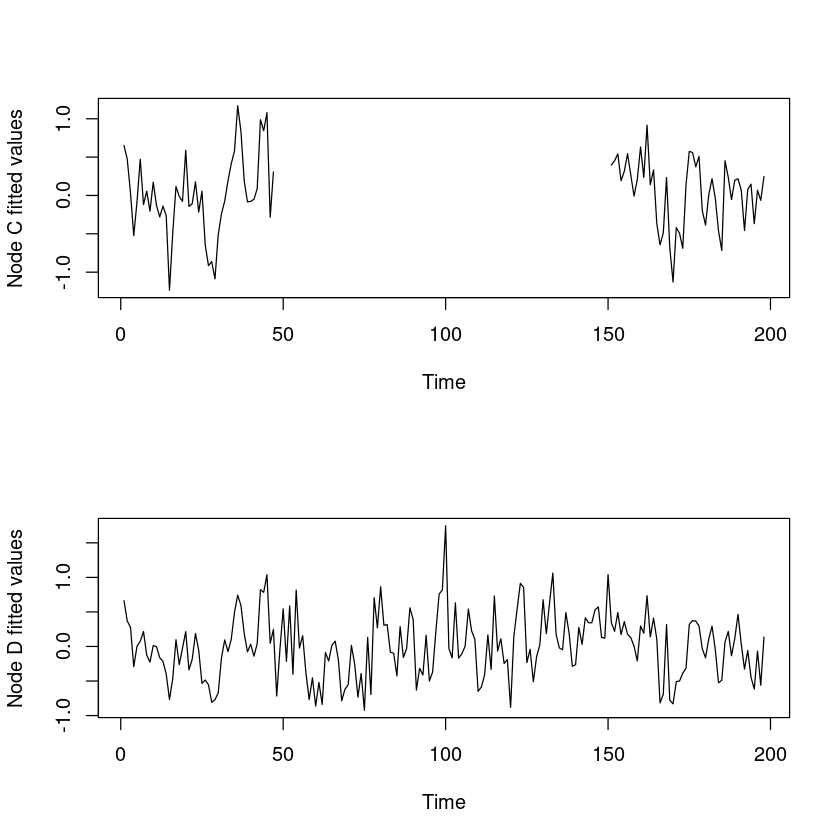

In [24]:
fiveVTS0 <- fiveVTS
fiveVTS0[50:150, 3] <- NA
nafit <- GNARfit(vts = fiveVTS0, net = fiveNet, alphaOrder = 2,
                 betaOrder = c(1,1))
layout(matrix(c(1,2),2,1))
plot(ts(fitted(nafit)[,3]),ylab = "Node C fitted values")
plot(ts(fitted(nafit)[,4]), ylab = "Node D fitted values")

Figure 4: Fitted values of global-α GNAR(1, [1]) fit to the ‘fiveVTS’ data, with observation 50–150 removed from node C. Fitted values: Top: Node C; Bottom: Node D.

As shown in Figure 4, after removing observations from the time series at node C, its neighbour, node D, still has a complete set of fitted values.

### 2.7. Stationarly conditions for a GNAR process with fixed network

Theorem 1 
- Given an unchanging network, $\cal{G}$, a sufficient condition for the GNAR model (1) to be stationary is 
$$ \sum^{p}_{j=1} \big( |α_{i,j} | + \sum^{C}_{c=1} \sum^{s_j}_{r=1} |β_{j,r,c}| \big) < 1 \text{   }∀i ∈ 1, ..., N \text{ . (2)}$$
- The proof of Theorem 1 can be found in Appendix A.
- For the global-$α$ model this condition reduces to
$$\sum^{p}_{j=1} |α_j | + \sum^{C}_{c=1} \sum^{s_j}_{r=1}|β_{j,r,c}| \big) < 1\text{. (3)}$$
- We can explore these conditions using the GNARsim function.
- The following example uses parameters whose absolute value sums to greater than one and then we calculate the mean over successive time periods.
- The mean increases rapidly indicating nonstationarity. 

In [26]:
set.seed(10)
fiveVTS4 <- GNARsim(n = 200, net = fiveNet,
                    alphaParams = list(rep(0.2,5)),betaParams = list(c(0.85)))
c(mean(fiveVTS4[1:50, ]),mean(fiveVTS4[51:100,]),
  mean(fiveVTS4[101:150,]), mean(fiveVTS4[151:200,]))

[1]    -120.511   -1370.216  -15725.884 -180319.140

### 2.8. Benefits of our model and comparisons to others

- Conditioned on a given network fixed in time and with a known (time-dependent) weight- and neighbourhood structure, the GNAR model can be mathematically formulated as a specific restricted VAR model, where the restrictions are imposed by the network and thus impact model parametrisation, as mathematically encoded by equation (1). 
- This is explored in more depth in Appendix B and contrasts with a VAR model where any restrictions can only be imposed on the parameters themselves.
    - 수학적 공식이 필요해..

- An unrestricted VAR model with dimension n has $\cal{O}(n^2)$ parameters, whereas a GNAR model with known network (usually) has $\cal{O}(n)$ parameters, and a global-$α$ GNAR model can have $\cal{O}(1)$ parameters. 
- The large, and rapidly increasing, number of parameters in VAR often make it a challenging model to fit and non-problem-specific mathematical constraints are often used to mitigate those challenges.
- Further, the large number of VAR parameters usually mean that it fits multivariate time series well, but then performs poorly in out-of-sample prediction. 
- An example of this is shown in Section 4.
- Our model has similarities with the network autoregression introduced by Zhu, Pan, Li, Liu, and Wang (2017), motivated by social networks.
- In our notation, the Zhu et al. (2017) model can be written as a special case as
$$X_{i,t} = β_0 + Z_{i}^\top γ + \sum^{p}_{j=1} \big( α_j X_{i,t−j} + β_j \sum_{q∈N^{(1)}(i)}ω_i X_{q,t−j} \big) + u_{i,t} \text{, (4)}$$

- where $β_0$ is a global intercept term, $Z_i$ is a vector of node-specific covariates with corresponding parameters $γ$, $ω_i$ is the reciprocal of the out-degree of node i, and the innovations are independent and identically distributed, with zero mean, such that $var(u_{i,t}) = σ^2$.
- Hence, the Zhu et al. (2017) model without intercept and node-specific covariates is a special case of our GNAR model, with $max_{j∈{1,...,p}}sj = 1, i.e.$, dependencies limited to stage-1 immediate neighbours, and un-weighted edges.
- Our model is designed to deal with a time-varying network, and our $β_{j,r,c}$ parameters can include general edge-based covariate information. 
- A further important advantage is that our GNAR model in Section 2.2 can express dependence on stage-r neighbour sets for any r.
- An earlier model with similarities to the generic network autoregression is the Dynamic Bayesian Network (DBN) model considered in Spencer, Hill, and Mukherjee (2015). 
- Their model can be written as
$$X_{i,t} = β_{0,i} + \sum_{q∈N^{(1)}(i)} β_{i,q}X_{q,t−1} + u_{i,t}\text{, (5)}$$

## 3. Estimation

### 3.1. Order selection

In [27]:
BIC(GNARfit())
BIC(GNARfit(betaOrder = c(2,1)))

[1] -0.003953124

[1] 0.02251406

In [28]:
AIC(GNARfit())
AIC(GNARfit(betaOrder = c(2,1)))

[1] -0.06991947

[1] -0.05994387

### 3.2. Model selection on a wind network time series

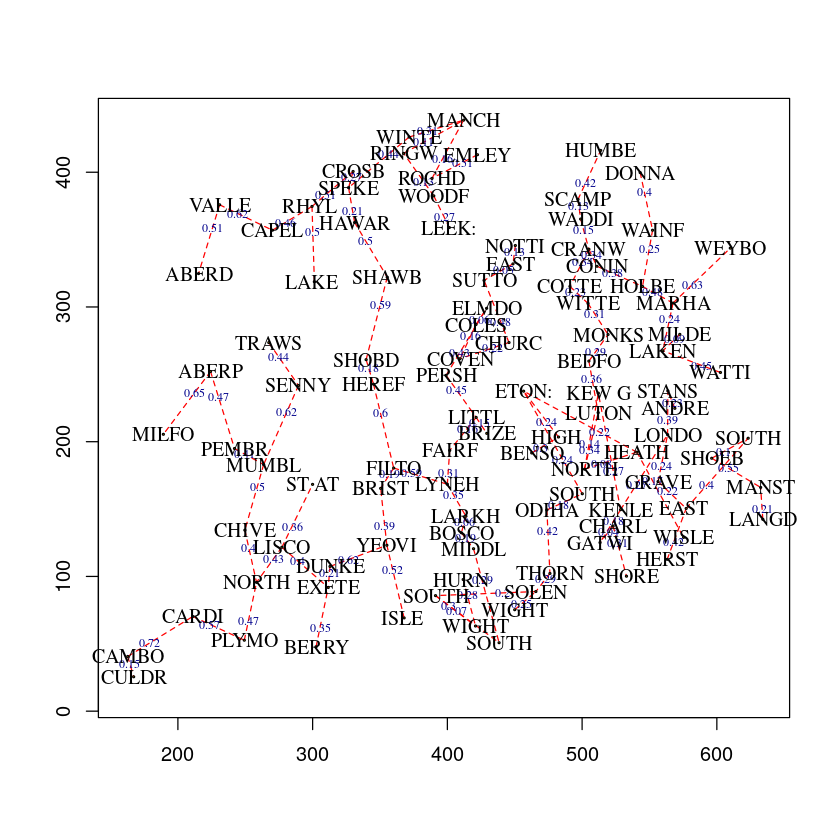

In [29]:
oldpar <- par(cex = 0.75)
par(mfrow = c(1,1))
windnetplot()
par(oldpar)

In [31]:
BIC(GNARfit(vts = vswindts, net = vswindnet, alphaOrder = 1,
            betaOrder = 0))
BIC(GNARfit(vts = vswindts, net = vswindnet, alphaOrder = 1,
            betaOrder = 0, globalalpha = FALSE))

[1] -233.3848

[1] -233.1697

Model: 
GNAR(2,[5,1]) 

Call:
lm(formula = yvec ~ dmat + 0)

Coefficients:
 dmatalpha1  dmatbeta1.1  dmatbeta1.2  dmatbeta1.3  dmatbeta1.4  dmatbeta1.5  
    0.56911      0.10932      0.03680      0.02332      0.02937      0.04709  
 dmatalpha2  dmatbeta2.1  
    0.23424     -0.04872  


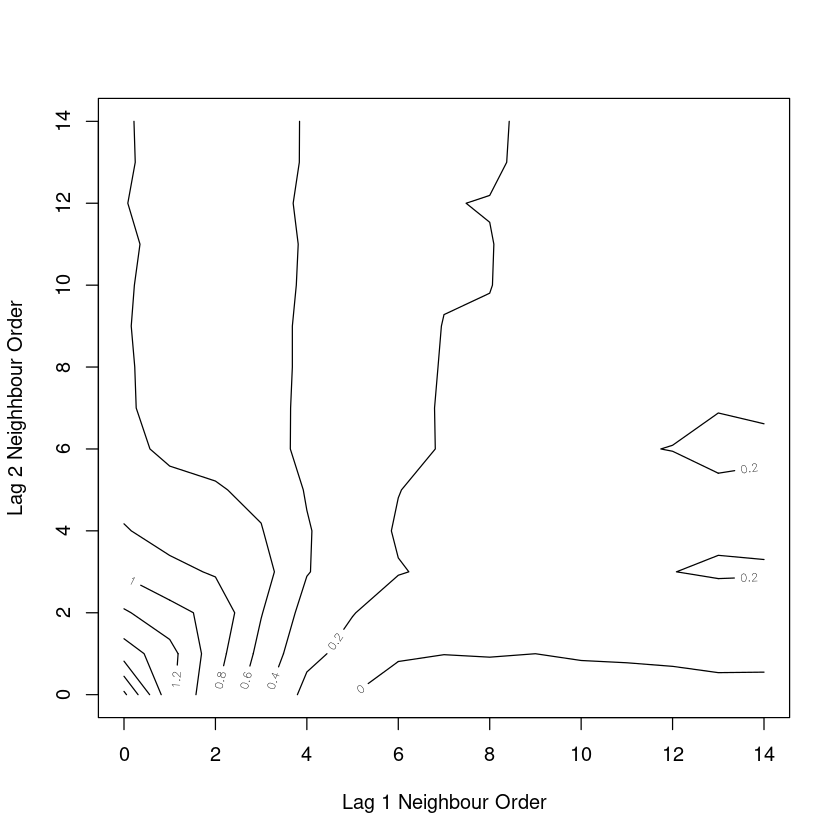

In [32]:
BIC.Alpha2.Beta <- matrix(0, ncol = 15, nrow = 15)
for(b1 in 0:14)
  for(b2 in 0:14)
    BIC.Alpha2.Beta[b1 + 1, b2 + 1] <- BIC(GNARfit(vts = vswindts,
                                                   net = vswindnet, alphaOrder = 2, betaOrder = c(b1, b2)))
par(mfrow = c(1,1))
contour(0:14, 0:14, log(251 + BIC.Alpha2.Beta),
        xlab = "Lag 1 Neighbour Order", ylab = "Lag 2 Neighhbour Order")

goodmod <- GNARfit(vts = vswindts, net = vswindnet, alphaOrder = 2,
                   betaOrder = c(5,1))
goodmod

### 3.3. Constructing a network to aid prediction

In [33]:
prediction <- predict(GNARfit(vts = fiveVTS[1:199,], net = fiveNet,
                              alphaOrder = 2, betaOrder = c(1,1)))
prediction

,Series 1,Series 2,Series 3,Series 4,Series 5
1,-0.6427718,0.2060671,0.2525534,0.1228404,-0.8231921


### 4. OECD GDP: Network structure aids prediction

In [67]:
library("fields")

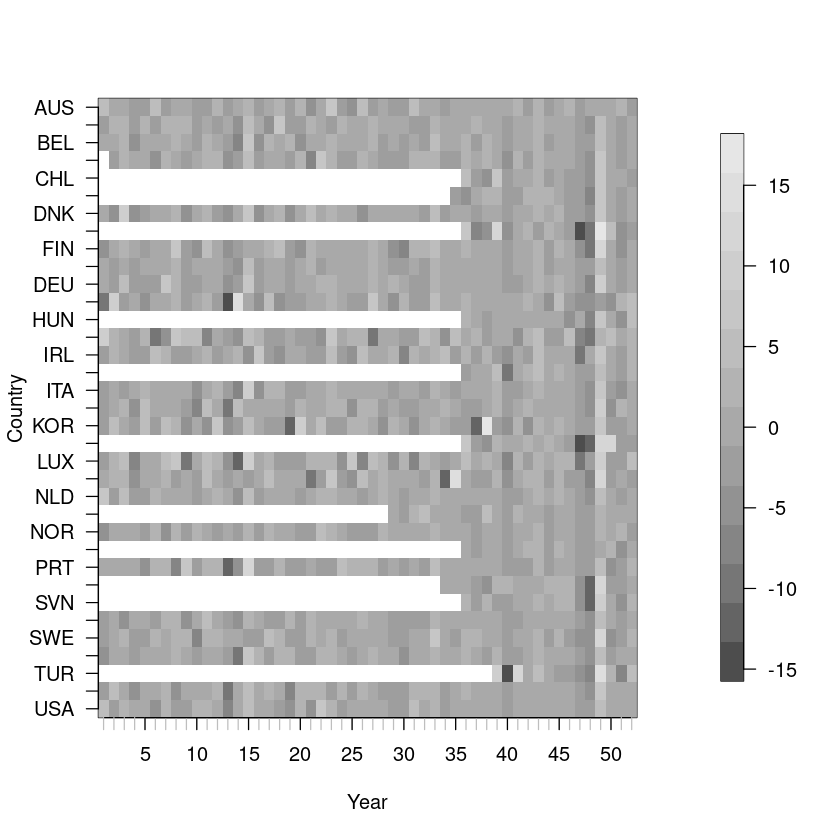

In [35]:
layout(matrix(c(1,2), nrow = 1, ncol = 2), widths = c(4.5,1))
image(t(apply(gdpVTS, 1, rev)), xaxt = "n",yaxt = "n",
      col = gray.colors(14), xlab = "Year", ylab = "Country")
axis(side = 1, at = seq(from = 0, to = 1, length = 52), labels = FALSE,
     col.ticks = "grey")
axis(side = 1, at = seq(from = 0, to = 1, length = 52)[5*(1:11)],
     labels = (1:52)[5*(1:11)])
axis(side = 2, at = seq(from = 1, to = 0, length = 35),
     labels = colnames(gdpVTS), las = 1, cex = 0.8)
layout(matrix(1))
image.plot(zlim = range(gdpVTS, na.rm = TRUE), legend.only = TRUE,
           col = gray.colors(14))

### 4.1. Finding a network to aid prediction

In [36]:
net1 <- seedToNet(seed.no = seed.nos[1], nnodes = 35, graph.prob = 0.15)
net2 <- seedToNet(seed.no = seed.nos[2], nnodes = 35, graph.prob = 0.15)

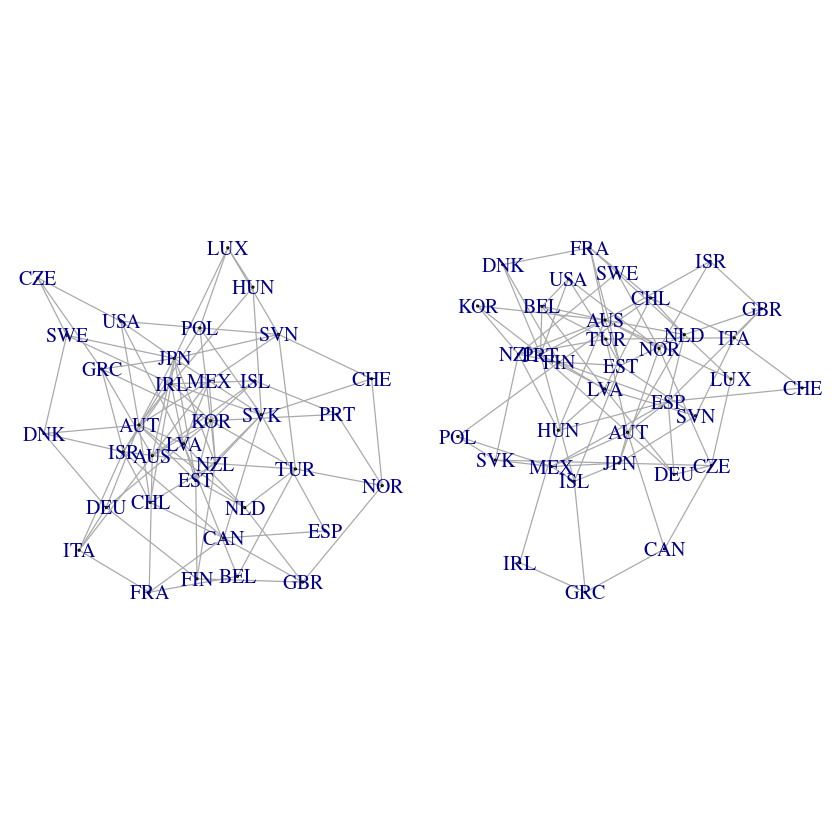

In [37]:
layout(matrix(c(2,1),1,2))
par(mar=c(0,1,0,1))
plot(net1, vertex.label = colnames(gdpVTS), vertex.size = 0)
plot(net2, vertex.label = colnames(gdpVTS), vertex.size = 0)

In [38]:
gdpVTSn <- apply(gdpVTS, 2, function(x){x / sd(x[1:50], na.rm = TRUE)})
alphas <- c(rep(1,2), rep(2,6))
betas <- list(c(0), c(1), c(0,0), c(1,0), c(1,1), c(2,0), c(2,1),c(2,2))
seedSim <- function(seedNo, modelNo, globalalpha){
  net1 <- seedToNet(seed.no = seedNo, nnodes = 35, graph.prob = 0.15)
  gdpPred <- predict(GNARfit(vts = gdpVTSn[1:50,], net = net1,
                             alphaOrder = alphas[modelNo], betaOrder = betas[[modelNo]],
                             globalalpha = globalalpha))
  return(sum((gdpPred - gdpVTSn[51,])^2))
}
seedSim(seed.nos[1], modelNo = 3, globalalpha = TRUE)
seedSim(seed.nos[1], modelNo = 3, globalalpha = FALSE)

[1] 11.50739

[1] 18.96766

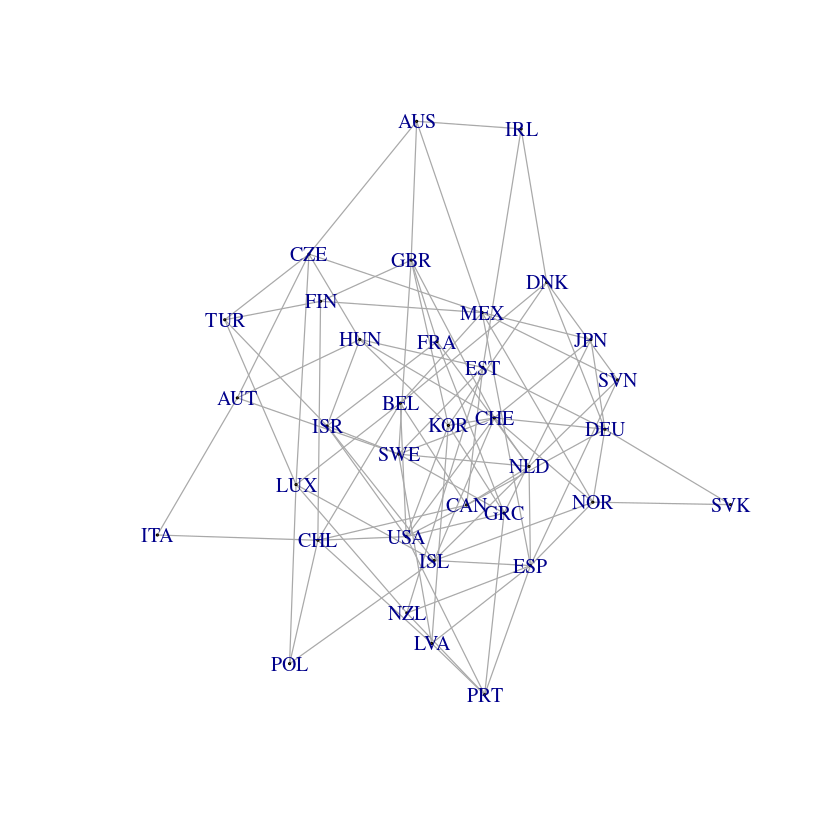

In [39]:
net921 <- seedToNet(seed.no = seed.nos[921], nnodes = 35,
                    graph.prob = 0.15)
layout(matrix(c(1),1,1))
plot(net921, vertex.label = colnames(gdpVTS), vertex.size = 0)

In [40]:
res <- rep(NA, 8)
for(i in 1:8){
  res[i] <- BIC(GNARfit(gdpVTSn[1:50,],
                        net = seedToNet(seed.nos[921], nnodes = 35, graph.prob = 0.15),
                        alphaOrder = alphas[i], betaOrder = betas[[i]]))
}

In [42]:
order(res)
sort(res)

[1] 6 3 4 7 8 5 1 2

[1] -64.44811 -64.32155 -64.18751 -64.12683 -64.09656 -63.86919 -60.67858
[8] -60.54207

### 4.2. Results and comparisons

In [43]:
gdpVTSn2 <- apply(gdpVTS, 2, function(x){x / sd(x[1:51], na.rm = TRUE)})
gdpFit <- GNARfit(gdpVTSn2[1:51,], net = net921, alphaOrder = 2,
                  betaOrder = c(2,0))

In [44]:
summary(gdpFit)


Call:
lm(formula = yvec2 ~ dmat2 + 0)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4806 -0.5491 -0.0121  0.5013  3.1208 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
dmat2alpha1  -0.41693    0.03154 -13.221  < 2e-16 ***
dmat2beta1.1 -0.12662    0.05464  -2.317   0.0206 *  
dmat2beta1.2  0.28044    0.06233   4.500  7.4e-06 ***
dmat2alpha2  -0.33282    0.02548 -13.064  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8926 on 1332 degrees of freedom
  (23 observations deleted due to missingness)
Multiple R-squared:  0.1859,	Adjusted R-squared:  0.1834 
F-statistic: 76.02 on 4 and 1332 DF,  p-value: < 2.2e-16

GNAR BIC: -62.86003

In [45]:
sum((predict(gdpFit) - gdpVTSn2[52,])^2)

[1] 5.737203

In [56]:
library("forecast")

In [57]:
arforecast <- apply(gdpVTSn2[1:51,], 2, function(x){
  forecast(auto.arima(x[!is.na(x)], d = 0, D = 0, max.p = 2, max.q = 0,
                      max.P = 0, max.Q = 0, stationary = TRUE, seasonal = FALSE, ic = "bic",
                      allowmean = FALSE, allowdrift = FALSE, trace = FALSE), h = 1)$mean
})
sum((arforecast - gdpVTSn2[52,])^2)

[1] 8.065491

In [58]:
library("vars")

In [59]:
gdpVTSn2.0 <- gdpVTSn2
gdpVTSn2.0[is.na(gdpVTSn2.0)] <- 0
varforecast <- predict(restrict(VAR(gdpVTSn2.0[1:51,], p = 1,
                                    type = "none")), n.ahead = 1)

In [60]:
getfcst <- function(x){return(x[1])}
varforecastpt <- unlist(lapply(varforecast$fcst, getfcst))
sum((varforecastpt - gdpVTSn2.0[52,])^2)

[1] 26.19805

In [61]:
gdpVTSn3 <- apply(gdpVTS, 2, function(x){x / sd(x[1:50], na.rm = TRUE)})
gdpPred <- predict(GNARfit(gdpVTSn2[1:50,], net = net921, alphaOrder = 2,
                           betaOrder = c(0,0)), n.ahead=2)

In [62]:
sum((gdpPred[1,] - gdpVTSn3[51,])^2)
sum((gdpPred[2,] - gdpVTSn3[52,])^2)

[1] 11.7874

[1] 8.067577

In [63]:
arforecast <- apply(gdpVTSn3[1:50,], 2, function(x){
  forecast(auto.arima(x[!is.na(x)], d = 0, D = 0, max.p = 2, max.q = 0,
                      max.P = 0, max.Q = 0, stationary = TRUE, seasonal = FALSE, ic = "bic",
                      allowmean = FALSE, allowdrift = FALSE, trace = FALSE), h = 2)$mean
})

In [64]:
sum((arforecast[1,] - gdpVTSn3[51,])^2)
sum((arforecast[2,] - gdpVTSn3[52,])^2)

[1] 18.56074

[1] 11.31722

In [65]:
gdpVTSn3.0 <- gdpVTSn3
gdpVTSn3.0[is.na(gdpVTSn3.0)] <- 0
varforecast <- predict(restrict(VAR(gdpVTSn3.0[1:50,],p=1,
                                   type = "none")), n.ahead = 2)
getfcst <- function(x){return(x[,1])}
varforecastpt <- matrix(unlist(lapply(varforecast$fcst, getfcst)),
                        nrow = 2, ncol = 35)

In [66]:
sum((varforecastpt[1,] - gdpVTSn3[51,])^2)
sum((varforecastpt[2,] - gdpVTSn3[52,])^2)

[1] 114.9876

[1] 120.4467